In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import numpy as np 
from scipy.stats import spearmanr
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

data = pd.read_csv("../../data/data_export.csv")

data["cited_by_count"] = pd.to_numeric(data["cited_by_count"], errors="coerce")

In [46]:
data = data[data['publication_year']<2024]

In [48]:
features = [
    'avg_author_h_index',
    'max_author_h_index',
    'journal_h_index',
    'avg_institution_h_index',
    'max_institution_h_index',
    'avg_author_citations_past_year',
    'max_author_citations_past_year',
    'avg_institution_citations_past_year',
    'max_institution_citations_past_year',
]

importance_data = []
categories = data['predicted_category'].unique()

for category in categories:
    subset = data[data['predicted_category'] == category]

    X = subset[features]
    y = subset['log_cited_by_count']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)

    perm_importance = permutation_importance(rf, X_test, y_test, random_state=42, n_repeats=100)
    importance_values = perm_importance.importances_mean

    feature_importance_dict = {'Category': category}
    for i, feature in enumerate(features):
        feature_importance_dict[feature] = importance_values[i]

    importance_data.append(feature_importance_dict)

# Create a DataFrame for feature importances
importance_df = pd.DataFrame(importance_data)

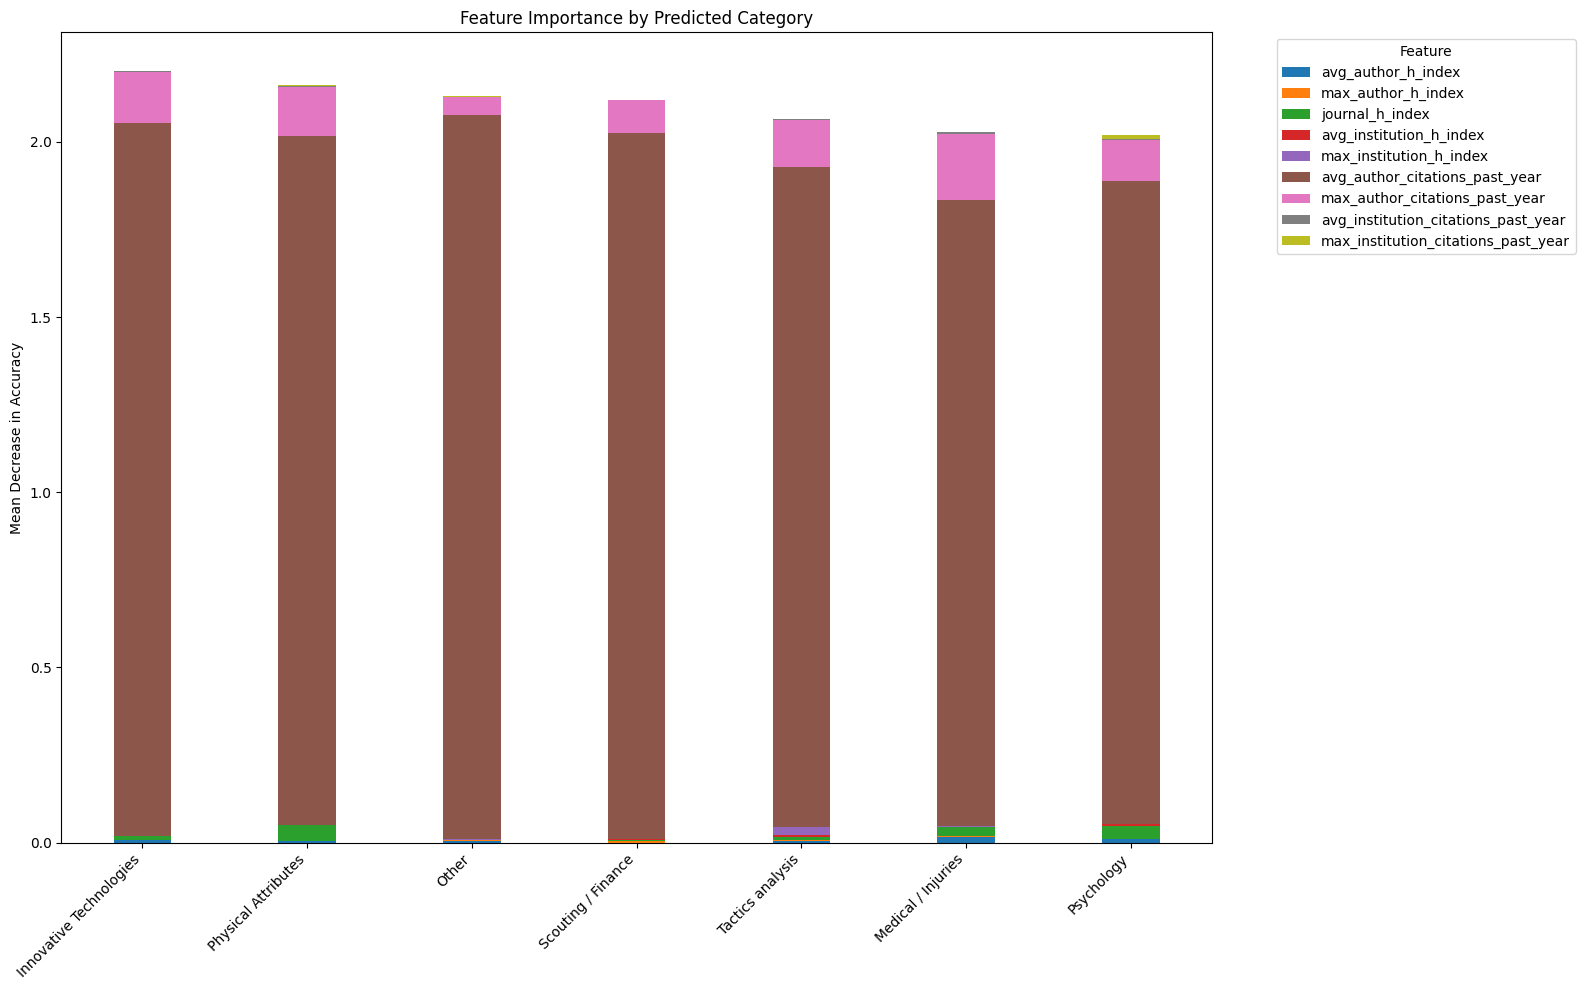

In [50]:
importance_df['Total Importance'] = importance_df[features].sum(axis=1)
importance_df = importance_df.sort_values(by='Total Importance', ascending=False)

categories = importance_df['Category']
x = np.arange(len(categories))
bar_width = 0.35

plt.figure(figsize=(16, 10))
bottom_values = np.zeros(len(categories))

for feature in features:
    plt.bar(x, importance_df[feature], bottom=bottom_values, label=feature, width=bar_width)
    bottom_values += importance_df[feature]

plt.xticks(x, categories, rotation=45, ha='right')
plt.ylabel('Mean Decrease in Accuracy')
plt.title('Feature Importance by Predicted Category')
plt.legend(title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("featureimportance.jpg", dpi=400)
plt.show()